# Homework - 1 - Professionalism and Reproducibility - Analysis

In [21]:
# Importing pandas for data manipulation. If you do not have pandas, you would have to install it using pip/pip3
import pandas as pd

# json is a standard python module
import json

'''
Matplotlib is the library being used for data visualization - it is not a standard python module. You may have to install it 
using pip/pip3 if you do not already have it installed.
''' 

import matplotlib.pyplot as plt

### Reading Timestamps from JSON Files - An Interesting Glitch

The Wikimedia Data represents Timestamps in the format "YYYYMM00".
JSON interprets those values in epoch time and replaces the timestamp values with the human equivalent conversion of the presumed epoch time. 

Timestamp thus has the unintentionally converted time values.
In order to obtain the timestamp data in the manner desired for further analysis, we create a column called "epoch_time"
which contains the timestamp values in their equivalent epoch time. 

Then, we modify the 'timestamp' column from the epoch time in the %Y%m%d format to obtain data usable in time-series analysis.\

We also replace the "_" in article titles obtained via the API with " ".

In [22]:
# Timestamp modification done for cumulative data

df_cumulative = pd.read_json("academy_monthly_cumulative_201501-202310.json", orient = "records")
df_cumulative['timestamp'] = pd.to_datetime(df_cumulative['timestamp'], format='%Y%m%d%H%M%S')
df_cumulative['epoch_time'] = (df_cumulative['timestamp'].apply(lambda x: x.timestamp()))/100
df_cumulative['timestamp'] = pd.to_datetime(df_cumulative['epoch_time'], format='%Y%m%d')

df_cumulative['article'] = df_cumulative['article'].replace("_", " ", regex = True)
df_cumulative.head()

,project,article,granularity,timestamp,agent,views,epoch_time
0,en.wikipedia,Everything Everywhere All at Once,monthly,2020-01-01,user,3515,20200101.0
1,en.wikipedia,Everything Everywhere All at Once,monthly,2020-02-01,user,8051,20200201.0
2,en.wikipedia,Everything Everywhere All at Once,monthly,2020-03-01,user,7159,20200301.0
3,en.wikipedia,Everything Everywhere All at Once,monthly,2020-04-01,user,14354,20200401.0
4,en.wikipedia,Everything Everywhere All at Once,monthly,2020-05-01,user,12061,20200501.0


In [23]:
# Timestamp modification done for mobile data

df_mobile = pd.read_json("academy_monthly_mobile_201501-202310.json", orient = "records")
df_mobile['timestamp'] = pd.to_datetime(df_mobile['timestamp'], format='%Y%m%d%H%M%S')
df_mobile['epoch_time'] = (df_mobile['timestamp'].apply(lambda x: x.timestamp()))/100
df_mobile['timestamp'] = pd.to_datetime(df_mobile['epoch_time'], format='%Y%m%d')

df_mobile['article'] = df_mobile['article'].replace("_", " ", regex = True)
df_mobile.head()

,project,article,granularity,timestamp,agent,views,epoch_time
0,en.wikipedia,Everything Everywhere All at Once,monthly,2020-01-01,user,2306,20200101.0
1,en.wikipedia,Everything Everywhere All at Once,monthly,2020-02-01,user,5107,20200201.0
2,en.wikipedia,Everything Everywhere All at Once,monthly,2020-03-01,user,4547,20200301.0
3,en.wikipedia,Everything Everywhere All at Once,monthly,2020-04-01,user,9824,20200401.0
4,en.wikipedia,Everything Everywhere All at Once,monthly,2020-05-01,user,8109,20200501.0


In [24]:
# Timestamp modification done for desktop data
df_desktop = pd.read_json("academy_monthly_desktop_201501-202310.json", orient = "records")
df_desktop['timestamp'] = pd.to_datetime(df_desktop['timestamp'], format='%Y%m%d%H%M%S')
df_desktop['epoch_time'] = (df_desktop['timestamp'].apply(lambda x: x.timestamp()))/100
df_desktop['timestamp'] = pd.to_datetime(df_desktop['epoch_time'], format='%Y%m%d')

df_desktop['article'] = df_desktop['article'].replace("_", " ", regex = True)
df_desktop.head()

,project,article,granularity,timestamp,agent,views,epoch_time
0,en.wikipedia,Everything Everywhere All at Once,monthly,2020-01-01,user,1209,20200101.0
1,en.wikipedia,Everything Everywhere All at Once,monthly,2020-02-01,user,2944,20200201.0
2,en.wikipedia,Everything Everywhere All at Once,monthly,2020-03-01,user,2612,20200301.0
3,en.wikipedia,Everything Everywhere All at Once,monthly,2020-04-01,user,4530,20200401.0
4,en.wikipedia,Everything Everywhere All at Once,monthly,2020-05-01,user,3952,20200501.0


## Analysis

### Maximum Average and Minimum Average

#### Question Description:
The first graph should contain time series for the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access. Your graph should have four lines (max desktop, min desktop, max mobile, min mobile).

#### Explanation:
We use the groupby function in pandas to group the data by the articles and finds the average views to obtain the monthly average views for each article. This is stored in a dataframe called 'average_views_desktop' for desktop views and 'average_views_mobile' for mobile views.

'sorted_aerticles_desktop' and 'sorted_articles_mobile' are the dataframes in the previous step, sorted in descending order.

That way, the first row represents the article with the highest average monthly views, while the last row corresponds to the least. 

'highest_avg_article_mobile', 'highest_avg_article_desktop' are the articles with the highest average monthly views for mobile and desktop, respectively.
.
'lowest_avg_article_mobile', 'lowest_avg_article_desktop' are the articles with the lowest average monthly views for mobile and desktop, respectively.

By doing this for both "desktop" and "mobile", we obtain 4 lines, plotted using the matplotlib library.

'highest_avg_data_desktop', 'highest_avg_data_mobile' contain all the data for the highest average monthly views for desktop and mobile, respectively. 

'lowest_avg_data_desktop', 'lowest_avg_data_mobile' contain all the data for the lowest average monthly views for desktop and mobile, respectively. 

Finally, 'highest_avg_data_desktop', 'highest_avg_data_mobile', 'lowest_avg_data_desktop' and 'lowest_avg_data_mobile' are plotted. 

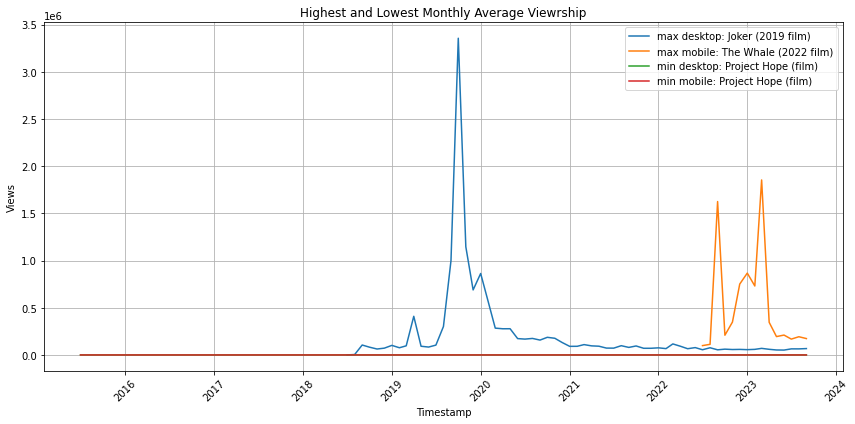

In [6]:
# Desktop
# Calculate the average monthly page requests for each article
average_views_desktop = df_desktop.groupby('article')['views'].mean().reset_index()

# Sort the articles based on the average monthly page requests
sorted_articles_desktop = average_views_desktop.sort_values(by='views', ascending=False)

# Select the articles with the highest and lowest averages
highest_avg_article_desktop = sorted_articles_desktop.iloc[0]['article']
lowest_avg_article_desktop = sorted_articles_desktop.iloc[-1]['article']

# Mobile
# Calculate the average monthly page requests for each article
average_views_mobile = df_mobile.groupby('article')['views'].mean().reset_index()

# Sort the articles based on the average monthly page requests
sorted_articles_mobile = average_views_mobile.sort_values(by='views', ascending=False)

# Select the articles with the highest and lowest averages
highest_avg_article_mobile = sorted_articles_mobile.iloc[0]['article']
lowest_avg_article_mobile = sorted_articles_mobile.iloc[-1]['article']


# Plot the time series for these selected articles
plt.figure(figsize=(12, 6))
plt.title('Highest and Lowest Monthly Average Viewrship')
plt.xlabel('Timestamp')
plt.ylabel('Views')

# Filter and plot the highest average article
highest_avg_data_desktop = df_desktop[df_desktop['article'] == highest_avg_article_desktop]
plt.plot(highest_avg_data_desktop['timestamp'], highest_avg_data_desktop['views'], label=f'max desktop: {highest_avg_article_desktop}')

highest_avg_data_mobile = df_mobile[df_mobile['article'] == highest_avg_article_mobile]
plt.plot(highest_avg_data_mobile['timestamp'], highest_avg_data_mobile['views'], label=f'max mobile: {highest_avg_article_mobile}')

# Filter and plot the lowest average article
lowest_avg_data_desktop = df_desktop[df_desktop['article'] == lowest_avg_article_desktop]
plt.plot(lowest_avg_data_desktop['timestamp'], lowest_avg_data_desktop['views'], label=f'min desktop: {lowest_avg_article_desktop}')

lowest_avg_data_mobile = df_mobile[df_mobile['article'] == lowest_avg_article_mobile]
plt.plot(lowest_avg_data_mobile['timestamp'], lowest_avg_data_mobile['views'], label=f'min mobile: {lowest_avg_article_mobile}')


plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


It is worth noting in the above result that the min desktop article ("Project Hope (film)") is almost fully superimposed by the min mobile article ("Project Hope (film)"), and thus it becomes difficult to identify the line denoting min desktop. 

You may view the min desktop article's line chart by not plotting the min mobile article. 

### Top 10 Peak Page Views

#### Question Description:
The second graph should contain time series for the top 10 article pages by largest (peak) page views over the entire time by access type. You first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. Your graph should contain the top 10 for desktop and top 10 for mobile access (20 lines).

#### Explanation:

Here, to find the maximum viewcount for each article over the months data that we have, we use groupby to group the data by the article and the views. We select the first occurrence of the highest value for each article. This is contained in the dataframes 'desktop_peak_months' and 'mobile_peak_months'.

'top_desktop_articles' and 'top_mobile_articles' contain the 10 largest articles by viewcount.

An array of 20 colors recognized by matplotlib is created so as to ensure unique color assignment to each of the 20 lines we expect to plot for this problem.

For each of the top desktop articles, we filter the data for that article, retrieves the 'timestamp' and 'views' columns, and plots the data as a line with a label indicating it's from the desktop category. The line is assigned a color from the colors list based on its position in the list. The same is done for the mobile category. 

We plot a total of 20 lines using the matplotlib library.

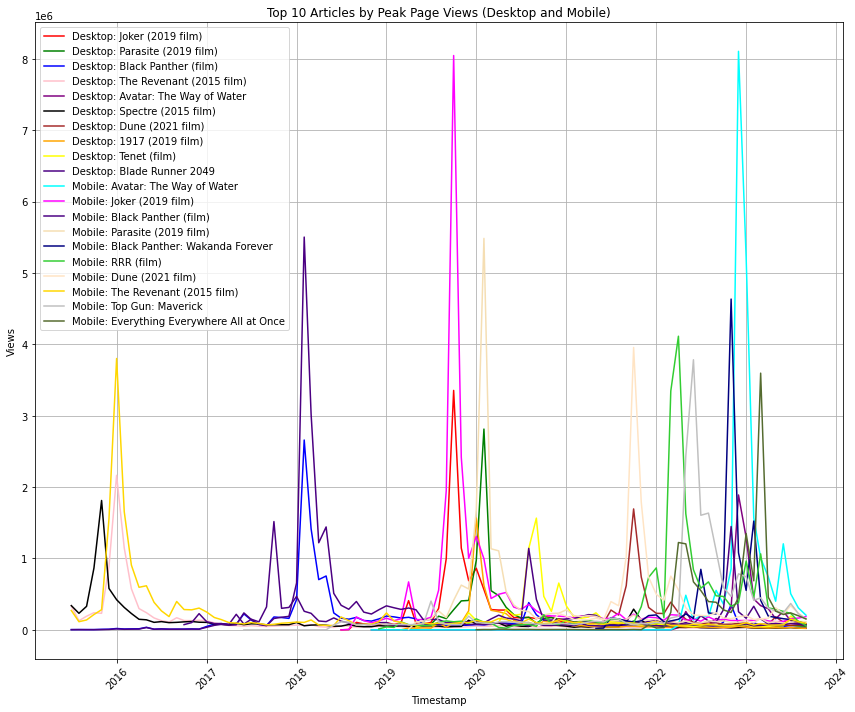

In [26]:
# Desktop
# Find the month with the highest page views for each article
desktop_peak_months = df_desktop.groupby('article')['views'].idxmax()
top_desktop_articles = df_desktop.loc[desktop_peak_months].nlargest(10, 'views')

# Mobile
# Find the month with the highest page views for each article
mobile_peak_months = df_mobile.groupby('article')['views'].idxmax()
top_mobile_articles = df_mobile.loc[mobile_peak_months].nlargest(10, 'views')

# Define a list of distinct colors for lines
colors = ['red', 'green', 'blue', 'pink', 'purple', 
          'black', 'brown', 'orange', 'yellow', 'indigo', 
          'cyan', 'magenta', 'indigo', 'wheat', 'navy', 
          'limegreen', 'bisque', 'gold', 'silver', 'darkolivegreen']

# Plot the time series for the top 10 articles for desktop and mobile access
plt.figure(figsize=(12, 10))
plt.title('Top 10 Articles by Peak Page Views (Desktop and Mobile)')
plt.xlabel('Timestamp')
plt.ylabel('Views')

# Plot the top 10 desktop articles
for idx, article_row in enumerate(top_desktop_articles.iterrows()):
    article_data = df_desktop[df_desktop['article'] == article_row[1]['article']]
    plt.plot(
        article_data['timestamp'], 
        article_data['views'], 
        label=f'Desktop: {article_row[1]["article"]}',
        color=colors[idx]
    )

# Plot the top 10 mobile articles
for idx, article_row in enumerate(top_mobile_articles.iterrows(), start=len(top_desktop_articles)):
    article_data = df_mobile[df_mobile['article'] == article_row[1]['article']]
    plt.plot(
        article_data['timestamp'], 
        article_data['views'], 
        label=f'Mobile: {article_row[1]["article"]}',
        color=colors[idx]
    )

plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Fewest Months of Data

#### Question Statement
The third graph should show pages that have the fewest months of available data. These will all be relatively short time series and should contain a set of the most recent academy award winners. Your graph should show the 10 articles with the fewest months of data for desktop access and the 10 articles with the fewest months of data for mobile access.

#### Explanation

The dataframe 'desktop_month_counts' contains the number of unique months of data available for each article in the df_desktop DataFrame. 'mobile_month_counts' does the same for mobile views.

'desktop_month_counts' contains the calculation upon grouping the data by the 'article' column and counting the number of unique 'timestamp' values for each group. We obtain how many months of data each article has.

.reset_index() converts the result back into a DataFrame with two columns: 'article' and 'timestamp', where 'timestamp' now holds the count of unique months.

.rename(columns={'timestamp': 'month_count'}) renames the 'timestamp' column to 'month_count' to make it more descriptive.

'desktop_month_counts' now contains the number of unique months of data for each article for desktop viewcounts. 'mobile_month_counts' contains the same data corresponding to mobile viewcounts.


'top_desktop_articles' selects the top 10 articles with the fewest months of desktop data. 'top_mobile_articles' does the same for the mobile data.

As in question 2, the list of colors is used to ensure unique color assignment to each of the 20 lines in the graph we will be plotting.

For each of the top desktop articles, we filter the data for that article, retrieves the 'timestamp' and 'views' columns, and plots the data as a line with a label indicating it's from the desktop category. The line is assigned a color from the colors list based on its position in the list. The same is done for the mobile category.

We plot 20 lines in total.

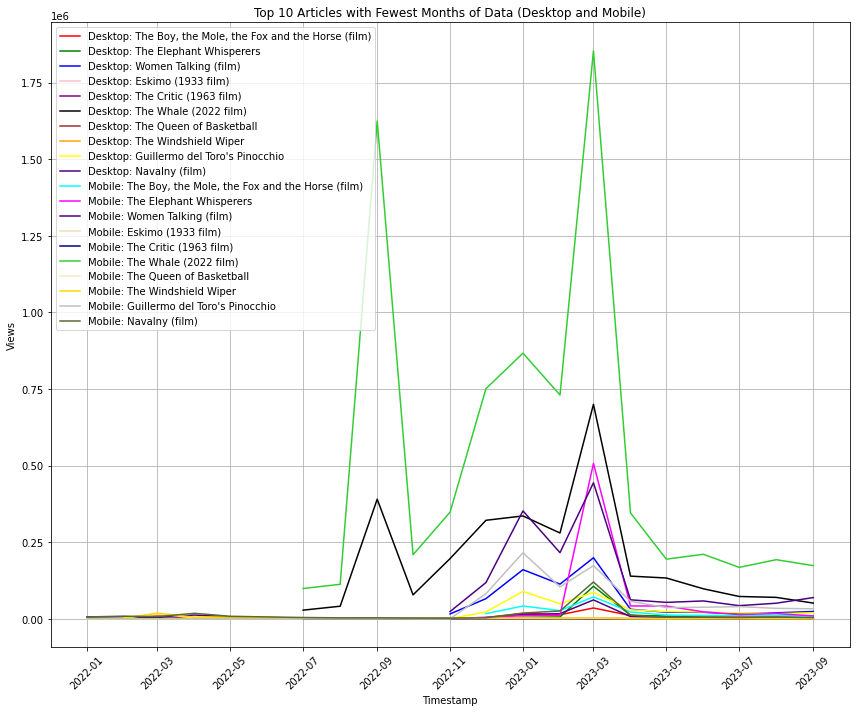

In [25]:
# Desktop
# Find the number of unique months of data for each article
desktop_month_counts = df_desktop.groupby('article')['timestamp'].nunique().reset_index()
desktop_month_counts = desktop_month_counts.rename(columns={'timestamp': 'month_count'})
top_desktop_articles = desktop_month_counts.nsmallest(10, 'month_count')['article']

# Mobile
# Find the number of unique months of data for each article
mobile_month_counts = df_mobile.groupby('article')['timestamp'].nunique().reset_index()
mobile_month_counts = mobile_month_counts.rename(columns={'timestamp': 'month_count'})
top_mobile_articles = mobile_month_counts.nsmallest(10, 'month_count')['article']

# Define a list of distinct colors for lines
colors = colors = ['red', 'green', 'blue', 'pink', 'purple', 
          'black', 'brown', 'orange', 'yellow', 'indigo', 
          'cyan', 'magenta', 'indigo', 'wheat', 'navy', 
          'limegreen', 'bisque', 'gold', 'silver', 'darkolivegreen']
        

# Plot the time series for the top 10 articles with the fewest months of data for desktop and mobile access
plt.figure(figsize=(12, 10))
plt.title('Top 10 Articles with Fewest Months of Data (Desktop and Mobile)')
plt.xlabel('Timestamp')
plt.ylabel('Views')

# Plot the top 10 desktop articles
for idx, article in enumerate(top_desktop_articles):
    article_data = df_desktop[df_desktop['article'] == article]
    plt.plot(
        article_data['timestamp'], 
        article_data['views'], 
        label=f'Desktop: {article}',
        color=colors[idx]
    )

# Plot the top 10 mobile articles
for idx, article in enumerate(top_mobile_articles, start=len(top_desktop_articles)):
    article_data = df_mobile[df_mobile['article'] == article]
    plt.plot(
        article_data['timestamp'], 
        article_data['views'], 
        label=f'Mobile: {article}',
        color=colors[idx]
    )

plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()